**🔹 Step 1 - Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**🔹 Step 2 - Uploading the dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


**🔹 Step 3 - Loading the dataset**

In [3]:
df = pd.read_csv("/content/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**🔹 Step 4 - Exploring the datas in the dataset**

In [4]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**🔹 Step 5 - Handling the missing values**

In [5]:
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column (too many missing values)
if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)

df.isnull().sum()

/tmp/ipython-input-35445233.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-35445233.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


**🔹 Step 6 - Converting categorical → numerical**

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Convert Sex column
if 'Sex' in df.columns:
    df['Sex'] = le.fit_transform(df['Sex'])

# One-hot encode Embarked
if 'Embarked' in df.columns:
    df = pd.get_dummies(df, columns=['Embarked'])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,False,False,True


**🔹 Step 7 - Feature scaling**

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = ['Age', 'Fare']

for col in num_cols:
    if col in df.columns:
        df[[col]] = scaler.fit_transform(df[[col]])

**🔹 Step 8 - Outlier detection**

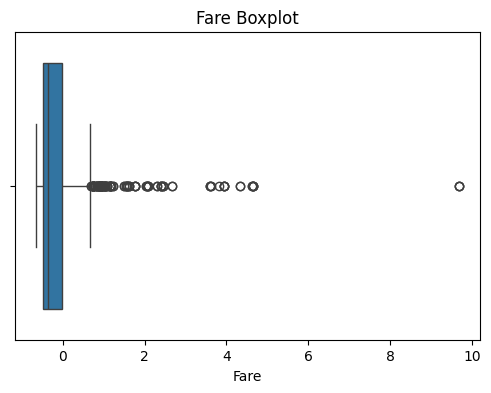

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Fare'])
plt.title("Fare Boxplot")
plt.show()

**🔹 Step 9 - Removing Outlier using IQR**

In [11]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Fare'] >= Q1 - 1.5*IQR) & (df['Fare'] <= Q3 + 1.5*IQR)]

**🔹 Step 10 - Final cleaned data**

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.565736,1,0,A/5 21171,-0.502445,False,False,True
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.258337,0,0,STON/O2. 3101282,-0.488854,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,0.433312,0,0,373450,-0.486337,False,False,True
5,6,0,3,"Moran, Mr. James",1,-0.104637,0,0,330877,-0.478116,False,True,False
6,7,0,1,"McCarthy, Mr. Timothy J",1,1.893459,0,0,17463,0.395814,False,False,True


**🔹 Step 11 - Save cleaned dataset**

In [13]:
df.to_csv("cleaned_dataset.csv", index=False)

**🔹 Step 12 - Download the cleaned dataset**

In [15]:
files.download("cleaned_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>